# 五 SVM 支持向量机

支持向量机（SVM）是一种二类分类模型，其基本模型是在特征空间中寻找间隔最大化的分离超平面

## 1 线性SVM

- 线性SVM函数

$$
f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x} + b
$$

- 非线性SVM函数（使用核技巧）

$$
f(\mathbf{x}) = \sum_{i=1}^{n} \alpha_i y_i K(\mathbf{x}_i, \mathbf{x}) + b
$$

- 损失函数（铰链损失（Hinge Loss），用于最大化类别间的边缘）

$$
L(\mathbf{w}) = \sum_{i=1}^{n} \max(0, 1 - y_i (\mathbf{w}^\top \mathbf{x}_i + b)) + \lambda \|\mathbf{w}\|^2
$$

- sklearn

[[-0.1   -0.098 -0.096 ...  1.096  1.098  1.1  ]
 [-0.1   -0.098 -0.096 ...  1.096  1.098  1.1  ]
 [-0.1   -0.098 -0.096 ...  1.096  1.098  1.1  ]
 ...
 [-0.1   -0.098 -0.096 ...  1.096  1.098  1.1  ]
 [-0.1   -0.098 -0.096 ...  1.096  1.098  1.1  ]
 [-0.1   -0.098 -0.096 ...  1.096  1.098  1.1  ]]


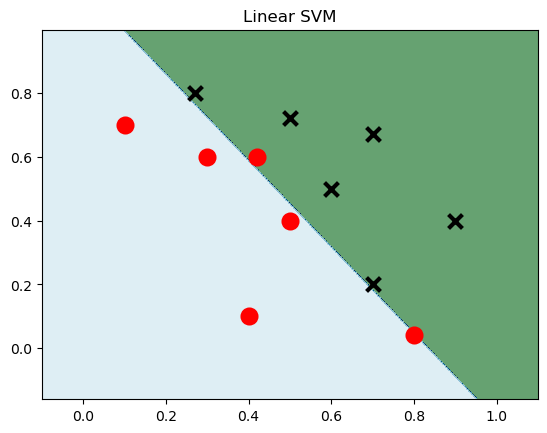

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

data = np.array([
    [0.1, 0.7],
    [0.3, 0.6],
    [0.4, 0.1],
    [0.5, 0.4],
    [0.8, 0.04],
    [0.42, 0.6],
    [0.9, 0.4],
    [0.6, 0.5],
    [0.7, 0.2],
    [0.7, 0.67],
    [0.27, 0.8],
    [0.5, 0.72]
])# 建立数据集
label = [1] * 6 + [0] * 6 #前六个数据的label为1后六个为0
x_min, x_max = data[:, 0].min() - 0.2, data[:, 0].max() + 0.2
y_min, y_max = data[:, 1].min() - 0.2, data[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.002),
                     np.arange(y_min, y_max, 0.002)) # meshgrid如何生成网格
print(xx)
model_linear = svm.SVC(kernel='linear', C = 0.001)# 线性svm
model_linear.fit(data, label) # 训练
Z = model_linear.predict(np.c_[xx.ravel(), yy.ravel()]) # 预测
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap = plt.cm.ocean, alpha=0.6)
plt.scatter(data[:6, 0], data[:6, 1], marker='o', color='r', s=100, lw=3) 
plt.scatter(data[6:, 0], data[6:, 1], marker='x', color='k', s=100, lw=3)
plt.title('Linear SVM')
plt.show()

In [21]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 加载数据
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 数据划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM 模型与超参数网格
model = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],  # 正则化参数
    'gamma': [1, 0.1, 0.01, 0.001],  # RBF核的参数
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
}

# 网格搜索与交叉验证
grid = GridSearchCV(model, param_grid, refit=True, verbose=0)
grid.fit(X_train, y_train)

# 最佳参数模型
best_model = grid.best_estimator_
print(best_model)
# 模型评估
predictions = best_model.predict(X_test)

# 评估结果
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

SVC(C=0.1, gamma=1, kernel='poly')
[[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

0.9777777777777777


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 加载数据
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 数据划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM 模型与超参数网格
model = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],  # 正则化参数
    'gamma': [1, 0.1, 0.01, 0.001],  # RBF核的参数
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
}

# 网格搜索与交叉验证
grid = GridSearchCV(model, param_grid, refit=True, verbose=0)
grid.fit(X_train, y_train)

# 最佳参数模型
best_model = grid.best_estimator_
print(best_model)
# 模型评估
predictions = best_model.predict(X_test)

# 评估结果
# print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

SVC(C=0.1, gamma=1, kernel='poly')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

0.9777777777777777
